# Cryptocurency Data Analysis

Provide some analysis about the price changemente through the last 20 years.

## Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
import plotly.express as px

### Select the Data Range

## Load Downloaded data

In [2]:
crypto = pd.DataFrame()

start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021,5,29)

crypto['Date'] = pd.date_range(start=start, end=end, freq='D')

In [3]:
#Bitcoin

btc = web.DataReader('BTC-USD', 'yahoo', start, end)
btc.reset_index(inplace=True)
crypto["BTC"]= btc["Adj Close"]
# crypto= btc[['Date','Adj Close']]
# crypto= crypto.rename(columns = {'Adj Close':'BTC'})
crypto[ 'BTC_7DAY_MA' ] = crypto.BTC.rolling( 7).mean()

In [4]:
#Ethereum

eth = web.DataReader("ETH-USD", 'yahoo', start, end)  # Collects data
eth.reset_index(inplace=True)
crypto["ETH"]= eth["Adj Close"]

# 7 day moving average
crypto[ 'ETH_7DAY_MA' ] = crypto.ETH.rolling( 7).mean()

In [5]:
#doge coin

doge = web.DataReader("DOGE-USD", 'yahoo', start, end)  # Collects data
doge.reset_index(inplace=True)
crypto["DOGE"]= doge["Adj Close"]

# 7 day moving average
crypto[ 'DOGE_7DAY_MA' ] = crypto.DOGE.rolling( 7).mean()

In [6]:
#BinanceCoin 

bnb = web.DataReader("BNB-USD", 'yahoo', start, end)  # Collects data
bnb.reset_index(inplace=True)
crypto["BNB"]= bnb["Adj Close"]

# 7 day moving average
crypto[ 'BNB_7DAY_MA' ] = crypto.BNB.rolling( 7).mean()

In [7]:
#Cardano

ada = web.DataReader("ADA-USD", 'yahoo', start, end)  # Collects data
ada.reset_index(inplace=True)
crypto["ADA"]= ada["Adj Close"]


# 7 day moving average
crypto[ 'ADA_7DAY_MA' ] = crypto.ADA.rolling( 7).mean()

In [8]:
#XRP

xrp = web.DataReader("XRP-USD", 'yahoo', start, end)  # Collects data
xrp.reset_index(inplace=True)
crypto["XRP"]= xrp["Adj Close"]

# 7 day moving average
crypto[ 'XRP_7DAY_MA' ] = crypto.XRP.rolling( 7).mean()

In [9]:
#Dash

dash = web.DataReader("DASH-USD", 'yahoo', start, end)  # Collects data
dash.reset_index(inplace=True)
crypto["DASH"]= dash["Adj Close"]

# 7 day moving average
crypto[ 'DASH_7DAY_MA' ] = crypto.DASH.rolling( 7).mean()

In [10]:
#getting the dates 

crypto.set_index("Date", inplace=True)

In [11]:
crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH']].head()

,BTC,ETH,DOGE,BNB,ADA,XRP,DASH
Date,,,,,,,
2021-01-01,29374.152344,730.367554,0.005685,37.905010,0.175350,0.237444,88.241707
2021-01-02,32127.267578,774.534973,0.010615,38.241592,0.177423,0.221655,86.969772
2021-01-03,32782.023438,975.507690,0.009771,41.148979,0.204995,0.225848,89.069138
2021-01-04,31971.914062,1040.233032,0.009767,40.926353,0.224762,0.236677,88.797173
2021-01-05,33992.429688,1100.006104,0.009920,41.734600,0.258314,0.226750,89.102776


In [12]:
crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH']].corr()

,BTC,ETH,DOGE,BNB,ADA,XRP,DASH
BTC,1.000000,0.454930,0.236921,0.686977,0.607695,0.522546,0.777766
ETH,0.454930,1.000000,0.917471,0.881418,0.834682,0.864639,0.836108
DOGE,0.236921,0.917471,1.000000,0.797366,0.729367,0.826126,0.713032
BNB,0.686977,0.881418,0.797366,1.000000,0.843082,0.932431,0.911126
ADA,0.607695,0.834682,0.729367,0.843082,1.000000,0.754436,0.809168
XRP,0.522546,0.864639,0.826126,0.932431,0.754436,1.000000,0.822123
DASH,0.777766,0.836108,0.713032,0.911126,0.809168,0.822123,1.000000


<AxesSubplot:>

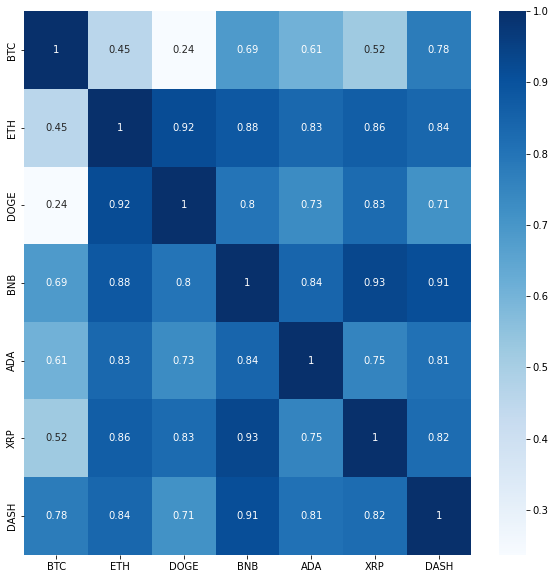

In [13]:
#heatmap

plt.figure(figsize = (10,10))
sns.heatmap(crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH']].corr(),annot=True, cmap='Blues')

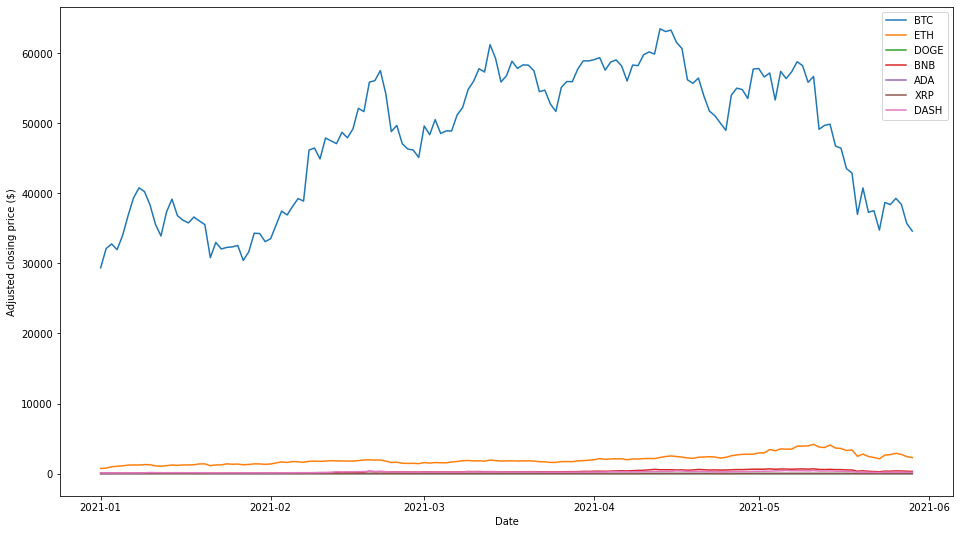

In [22]:
data = ["BTC",'ETH','DOGE','BNB','ADA','XRP','DASH']

fig, ax = plt.subplots(figsize=(16,9))

for dt in data:
    ax.plot(crypto.index, crypto[dt], label=dt)
    
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [40]:
btc = crypto[['BTC']]
btc.reset_index(inplace=True)

In [41]:
short_window = 10
mid_window = 50

signals = pd.DataFrame(index=crypto['BTC'].index)
signals['signal'] = 0.0

roll_d10 = btc.rolling(window=short_window).mean()
roll_d50 = btc.rolling(window=mid_window).mean()

signals['short_mavg'] = roll_d10
signals['mid_mavg'] = roll_d50

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

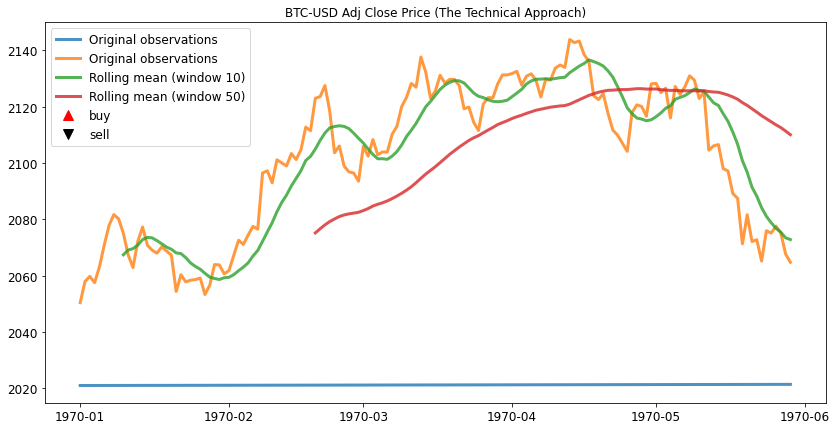

In [44]:
plt.figure(figsize=(14, 7))
plt.plot(btc.index, btc, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc.index, roll_d10, lw=3, alpha=0.8,label='Rolling mean (window 10)')
plt.plot(btc.index, roll_d50, lw=3, alpha=0.8,label='Rolling mean (window 50)')
plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k', label='sell')
plt.title('BTC-USD Adj Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()